In [4]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as sym

%matplotlib inline

plt.style.use(['science', 'notebook', 'grid'])

Material Object with Name: K-391
------------------------------
Young's Modulus;  1
Shear Modulus:  2
Poisson's Ratio:  -0.75
Elastic Limit:  inf
Shear Elastic Limit:  inf
Maximum Yielding Strain:  inf
Maximum Shear Yielding Strain:  inf
Ultimate Stress:  inf
Ultimate Shearing Strain:  inf
Ultimate Strain:  inf
Ultimate Shearing Strain:  inf
Fracture Stress:  inf
Fracture Shear Stress:  inf
Fracture Strain:  inf
Fracture Shear Strain:  inf
Modulus of Resilliance:  inf

Linear Stress/Strain Plot: 
-------------------------
Shear Stress/Strain Plot: 
------------------------


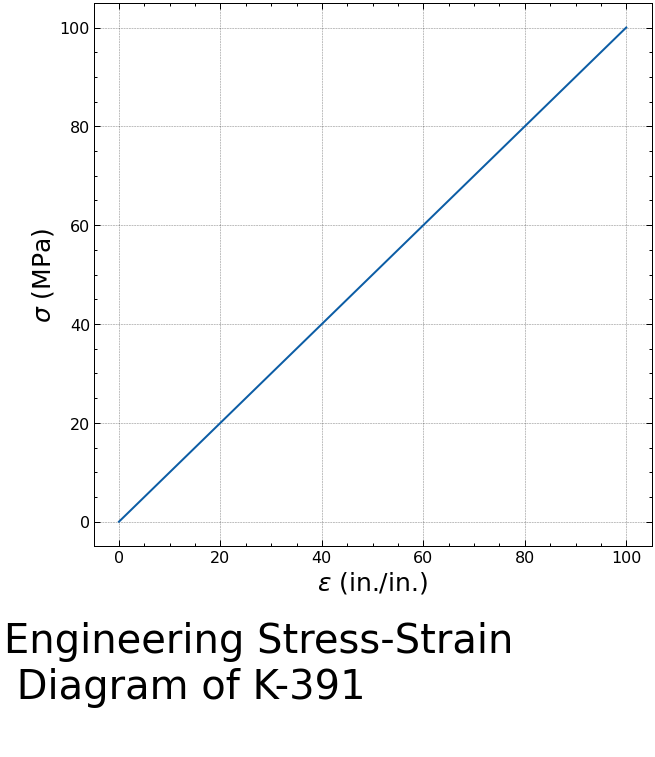

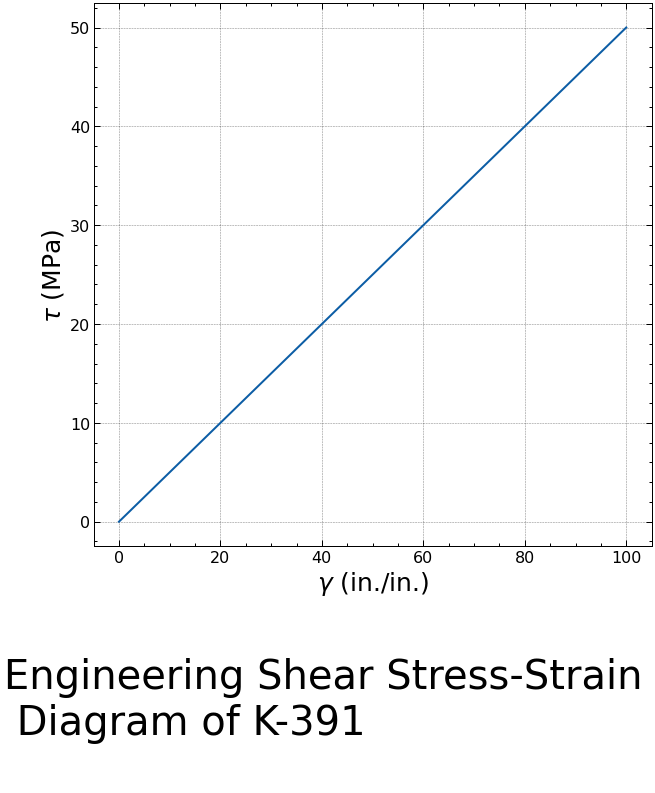

In [51]:
# LINEAR ELASTIC MATERIAL
# Change name to Linear Elastic Material
class material: 
    def __init__(self, youngs_modulus=sym.Symbol(r'E'), shear_modulus=sym.Symbol(r'G'), poisson_ratio=sym.Symbol(r'$\sigma$'), 
        elastic_limit=np.inf, shear_elastic_limit=np.inf, max_yield_strain=np.inf, max_shear_yield_strain=np.inf, ultimate_stress = np.inf,
        ultimate_shear_stress=np.inf, ultimate_strain=np.inf, ultimate_shear_strain=np.inf, fracture_stress=np.inf,
        fracture_shear_stress=np.inf, fracture_strain=np.inf, fracture_shear_strain=np.inf, Name=""):
        
        # Basic Elastic Properties
        self.Name = Name
        self.youngs_modulus = youngs_modulus
        self.shear_modulus = shear_modulus


        self.poisson_ratio = poisson_ratio
        self.elastic_limit = elastic_limit
        # Max yielding stress is the stress at the proportional limit
        self.max_yield_strain = max_yield_strain
        self.ultimate_stress = ultimate_stress
        self.fracture_stress = fracture_stress
        self.fracture_strain = fracture_strain
        self.ultimate_stress = ultimate_stress
        self.ultimate_strain = ultimate_strain

        # Shear Properties
        self.shear_elastic_limit = shear_elastic_limit
        self.max_shear_yield_strain = max_shear_yield_strain
        self.ultimate_shear_stress = ultimate_shear_stress
        self.ultimate_shear_strain = ultimate_shear_strain
        self.fracture_shear_stress = fracture_shear_stress
        self.fracture_shear_strain = fracture_shear_strain

    
    def strain(self, stress):
        if self.elastic_limit == np.inf:
            return stress/self.youngs_modulus

        xlist = [0,self.elastic_limit/self.youngs_modulus, self.max_yield_strain, self.ultimate_strain, self.fracture_strain] # All strains
        ylist = [0, self.elastic_limit, self.elastic_limit, self.ultimate_stress, self.fracture_stress]
        
        func1 = interp1d(xlist, ylist, kind='linear') # Fix this: This fails if elastic_limit is infinite
        return func1(stress)
        

    def shear_strain(self, shear_stress):
        
        if self.shear_elastic_limit == np.inf:
            return shear_stress/self.shear_modulus

        xlist = [0,self.shear_elastic_limit/self.shear_modulus, self.max_shear_yield_strain, self.ultimate_shear_strain, self.fracture_shear_strain] # All strains
        ylist = [0, self.shear_elastic_limit, self.shear_elastic_limit, self.ultimate_shear_stress, self.fracture_shear_stress]

        func1 = interp1d(xlist, ylist, kind='linear')
        return func1(shear_stress)

    def solve(self):

        # Just use G = E/[2 *(1 + v)] to solve for one variable if one is missing
        symbols = self.unravel()
        unsolved_symbols = symbols[np.vectorize(type)(self.unravel()) == sym.Symbol] 
        solved_symbols = symbols[np.vectorize(type)(self.unravel()) != sym.Symbol]
        
        eqn = self.shear_modulus - self.youngs_modulus / ( 2 * (1 + self.poisson_ratio))
        solutions = sym.solve(eqn, unsolved_symbols)

        for i, j in enumerate(symbols):
            if j in unsolved_symbols:
                symbols[i] = solutions[list(unsolved_symbols).index(j)]
        
        return material(symbols[0], symbols[1], symbols[2], self.elastic_limit,
        self.shear_elastic_limit, self.max_yield_strain, self.max_shear_yield_strain, self.ultimate_stress, self.ultimate_shear_stress, 
        self.ultimate_strain, self.ultimate_shear_strain, self.fracture_stress, self.fracture_shear_stress, 
        self.fracture_strain, self.fracture_shear_strain, self.Name)



    def unravel(self): # unravels all parameters except for elastic limit - No equations that relate it to something else
        return np.array([self.youngs_modulus, self.shear_modulus, self.poisson_ratio])


    def show(self):

        if self.Name != "":
            print("Material Object with Name:", self.Name)
            print("------------------------------")
        else:
            print("Material Object:")
            print("----------------")
        
        print("Young's Modulus; ", self.youngs_modulus)
        print("Shear Modulus: ", self.shear_modulus)
        print("Poisson's Ratio: ", self.poisson_ratio)
        print("Elastic Limit: ", self.elastic_limit)
        print("Shear Elastic Limit: ", self.shear_elastic_limit)
        print("Maximum Yielding Strain: ", self.max_yield_strain)
        print("Maximum Shear Yielding Strain: ", self.max_shear_yield_strain)
        print("Ultimate Stress: ", self.ultimate_stress)
        print("Ultimate Shearing Strain: ", self.ultimate_shear_strain)
        print("Ultimate Strain: ", self.ultimate_strain)
        print("Ultimate Shearing Strain: ", self.ultimate_shear_strain)
        print("Fracture Stress: ", self.fracture_stress)
        print("Fracture Shear Stress: ", self.fracture_shear_stress)
        print("Fracture Strain: ", self.fracture_strain)
        print("Fracture Shear Strain: ", self.fracture_shear_strain)
        print("Modulus of Resilliance: ", self.resillience())

        # Normal Stress/Stain Plot
        # <--- Defaults to yielding after the elastic limit

        print("\nLinear Stress/Strain Plot: ")
        print("-------------------------")
        fig, ax = plt.subplots(1, 1, figsize=(10,10))
        fig.text(0,-0.15,f"Engineering Stress-Strain\n Diagram of {self.Name}\n", fontsize=40)
        ax.set_xlabel(r'$\epsilon$ (in./in.)', fontsize=25)
        ax.set_ylabel(r'$\sigma$ (MPa)', fontsize=25)

        # Setup the graphing range, default to 100 MPa Max.
        # <--- Defaults to yielding after the elastic limit
        if self.fracture_strain == np.inf:
            epsilon_range = np.linspace(0, 100, 1000)
        else:
            epsilon_range = np.linspace(0, self.fracture_strain, 100)

        ax.plot(epsilon_range, np.vectorize(self.strain)(epsilon_range), '-') # <-- Plot the epsilon range

        # Shear Plot
        print("Shear Stress/Strain Plot: ")
        print("------------------------")
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        fig.text(0, -0.2, f"Engineering Shear Stress-Strain\n Diagram of {self.Name}\n", fontsize=40)
        ax.set_xlabel(r'$\gamma$ (in./in.)', fontsize=25)
        ax.set_ylabel(r'$\tau$ (MPa)', fontsize=25)

        # Setup the graphing range, default to 100 MPa Max.
        if self.fracture_shear_strain == np.inf:
            gamma_range = np.linspace(0, 100, 1000)
        else:
            gamma_range = np.linspace(0, self.fracture_shear_strain, 100)

        ax.plot(gamma_range, np.vectorize(self.shear_strain)(gamma_range))


    def resillience(self):
        return 1/2 * self.youngs_modulus * self.elastic_limit ** 2


x = material(1, 2, -3/4, Name="K-391")
x.show()

In [18]:
# Geometry Definitions--->

from glob import glob


I3 = np.diag([1,1,1])
I2 = I3[:2, :2]


# Just a useful niche
def unit_interval(k=0): # Generate Unit Interval centered at k
        return np.linspace(k-1/2, k+1/2, 100)

# Very Useful, I Swear: Though itertools provides better of doing the same thing, still 
# This is fun anyways - Dunno how this ix_ works tho, just pulled this off of stackoverflow
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

def cartesian_product(list1, list2, list3):
    return [(i,j,k) for i in list1 for j in list2 for k in list3]

# The Simplest Geometry
def cube(center=(0,0,0), orientation=I3, size=1): # Specify the orientation as a matrix of eurler angles  
   
    def unit_cube(center=(0,0,0)): # Generate Unit Cubes: Default Orientation
        return cartesian_product(unit_interval(center[0]), unit_interval(center[0]), unit_interval(center[0]))

    #if orientation is I3: # If orientation is I3: No need to do anything - speeds this process up
    #   return size * unit_cube(center)
    orient = lambda x: orientation@x
    return size * np.vectorize(orient)(unit_cube(center))

# The most symmetric one
def sphere(center=(0,0,0), radius=1):
    cube_ = cube(center, size=2*radius)

    def is_in_sphere(point):
        global radius, center
        vect1 = center-point
        if np.size(vect1) <= radius:
            return True
        return False

    cube_ = cube_[np.vectorize(is_in_sphere)(cube_)]
    return cube_


COMM = '''
class geometry:
    def __init__(self, voxel_location="", mesh_array=np.zeros(100,100,100), mesh_location=""):
        if voxel_location != "":
            self.geometry = open(voxel_location, 'r')
        else:
            self.geometry = cube()


    def voxel_plot3d(self):
        ax = plt.axes(projection='3d')
        ax.contour3D(self.geometry[0], self.geometry[1], self.geometry[2].reshape(self.geometry.size/2, self.geometry.size/2)) '''

In [19]:
sphere()

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [8]:
class object:
    def __init__(self, geometry=cube(), material=None):
        self.geometry = geometry
        self.material = material

    def geo(self): # -> Do whatever you want
        return self.geometry
    
    def mat(self):
                return self.mat

NameError: name 'product' is not defined

In [3]:
def set_product(a, b):
    return [(i, j) for i in b for j in a]

set_product([1,2], [2,3])

[(2, 1), (2, 2), (3, 1), (3, 2)]

In [54]:
z[1]

-1.0